In [58]:
# Import thư viện 
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [2]:
# Load data
df = pd.read_csv('sales_data_sample.csv',
                 header=0,delimiter=','
                 ,encoding='utf-8')
df.head()

,ORDERNUMBER,QUANTITYORDERED,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,COUNTRY,DEALSIZE
0,10107,30,2,2871.00,2/24/2003 0:00,Shipped,USA,Small
1,10121,34,5,2765.90,5/7/2003 0:00,Shipped,France,Small
2,10134,41,2,3884.34,7/1/2003 0:00,Shipped,France,Medium
3,10145,45,6,3746.70,8/25/2003 0:00,Shipped,USA,Medium
4,10159,49,14,5205.27,10/10/2003 0:00,Shipped,USA,Medium


In [3]:
# Xem dữ liệu 
df.shape

(2823, 8)

In [6]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'ORDERLINENUMBER', 'SALES',
       'ORDERDATE', 'STATUS', 'COUNTRY', 'DEALSIZE'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   STATUS           2823 non-null   object 
 6   COUNTRY          2823 non-null   object 
 7   DEALSIZE         2823 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 176.6+ KB


In [13]:
# xem giá trị của SALES ở dòng 100
print('Value SALES in index 100: ',df.loc[100 , 'SALES'])

Value SALES in index 100:  2990.13


In [14]:
# Lấy giá trị max của cột sales
print('Max of column sales: ',df['SALES'].max())

Max of column sales:  14082.8


In [15]:
#Áp dụng Max Absolute Scaling
# Công thức lấy giá trị có index = 100 chia cho max
maxsales = df['SALES'].max()
max100 = df.loc[100 , 'SALES']
print('Max Absolute Scaling: ',max100 / maxsales ) 

Max Absolute Scaling:  0.21232496378561083


In [20]:
kurt = kurtosis(df['QUANTITYORDERED'])
print(f'Giá trị kurtosis: {kurt}')

Giá trị kurtosis: 0.4128831579388397


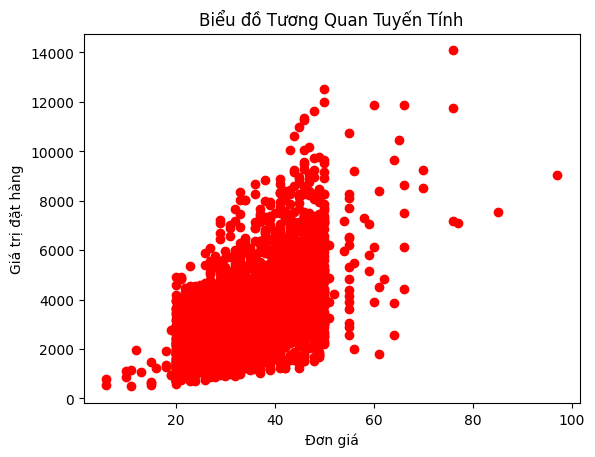

In [21]:
# Vẽ biểu đồ tương quan tuyến tính
plt.scatter(df['QUANTITYORDERED'], df['SALES'], color='r')
plt.xlabel('Đơn giá')
plt.ylabel('Giá trị đặt hàng')
plt.title('Biểu đồ Tương Quan Tuyến Tính')
# Hiển thị biểu đồ
plt.show()

In [24]:
#Giá trị lệch của SALES khi được transform qua hàm f(x) = 1 / (log(x)^2 +1) rồi tiếp tục đi qua hàm f(x) = sqrt (x)
# Xem dữ liệu cột SALES
df[['SALES']]

,SALES
0,2871.00
1,2765.90
2,3884.34
3,3746.70
4,5205.27
...,...
2818,2244.40
2819,3978.51
2820,5417.57
2821,2116.16


In [25]:
df['sales_transform1'] = 1 / (np.log(df['SALES'])**2 + 1)
h=df['sales_transform1']
n=skew(h)
print('độ lệch câu 7 ',n)
df['sales_transform2'] = np.sqrt(df['sales_transform1'])
p=df['sales_transform2']
t = skew(p)
print('độ lệch câu 6 ',t)

độ lệch câu 7  0.7675895261439601
độ lệch câu 6  0.5659624607534838


In [26]:
# Xóa cột 'sales_transform1' và 'sales_transform2' khỏi DataFrame
df = df.drop(['sales_transform1', 'sales_transform2'], axis=1)

In [27]:
quantity_order_counts = df.groupby('ORDERLINENUMBER')['QUANTITYORDERED'].value_counts()
print("Số dòng đặt hàng nhiều nhất là:",quantity_order_counts)

Số dòng đặt hàng nhiều nhất là: ORDERLINENUMBER  QUANTITYORDERED
1                43                 15
                 32                 14
                 34                 14
                 24                 13
                 26                 13
                                    ..
18               31                  1
                 36                  1
                 40                  1
                 42                  1
                 48                  1
Name: count, Length: 563, dtype: int64


In [28]:
# Hãy sắp sếp mức độ giảm dần độ lệch của SALES 
# sau khi được tranforms qua log,sqrt, square và cube root ?
sales_log = np.log(df['SALES']).skew()
sales_sqrt = np.sqrt(df['SALES']).skew()
sales_square = np.square(df['SALES']).skew()
sales_cube = np.cbrt(df['SALES']).skew()

print('sales_log : ', sales_log)
print('sales_sqrt : ', sales_sqrt)
print('sales_square : ', sales_square)
print('sales_cube : ', sales_cube)

sales_log :  -0.2021742362869817
sales_sqrt :  0.47281500087876144
sales_square :  2.915766495908139
sales_cube :  0.25086487312083416


In [30]:
# H0: độc lập 
# Pvalue < 0 chấp nhận H0 => không phụ thuộc
# Pvalue > 0 bác bỏ H0 => có phụ thuộc
model = ols ('QUANTITYORDERED ~ STATUS + DEALSIZE + STATUS:DEALSIZE', data=df).fit()
result = sm.stats.anova_lm(model, type = 2)
print(result)

                     df         sum_sq       mean_sq           F  \
STATUS              5.0    3562.031394    712.406279    9.934607   
DEALSIZE            2.0   59596.757162  29798.378581  415.542636   
STATUS:DEALSIZE    10.0    4970.214184    497.021418    6.931035   
Residual         2806.0  201217.018730     71.709558         NaN   

                        PR(>F)  
STATUS            1.959223e-09  
DEALSIZE         8.508626e-159  
STATUS:DEALSIZE   8.382818e-11  
Residual                   NaN  


In [32]:
#Có mối liên hệ giữa trạng thái 
# giao hàng và kích thước không
# Tạo bảng tần số chéo (contingency table)
contingency_table = pd.crosstab(df['STATUS'], df['DEALSIZE'])
# Thực hiện kiểm định chi-squared
chi2, p, _, _ = chi2_contingency(contingency_table)
# In kết quả kiểm định
print(f"Giá trị chi-squared: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("Có mối quan hệ giữa STATUS và DEALSIZE.")
else:
    print("Không có mối quan hệ giữa STATUS và DEALSIZE.")

Giá trị chi-squared: 34.344354882679596
P-value: 0.0001614574648411617
Có mối quan hệ giữa STATUS và DEALSIZE.


In [34]:
#Cho biết độ lệch của 
# giá trị đặt hàng của các sản phẩm 
print('Giá trị đặt hàng của các sản phẩm: ',skew(df['SALES']))

Giá trị đặt hàng của các sản phẩm:  1.160458972499323


In [37]:
# Có bao nhiêu quốc 
# gia đặt hàng tại công ty ABC
#print('Số quốc gia đặt hàng tại công ty ABC: ', len(df['COUNTRY'].unique()))
print('Số quốc gia đặt hàng tại công ty ABC: ', df['COUNTRY'].nunique())

Số quốc gia đặt hàng tại công ty ABC:  19
Số quốc gia đặt hàng tại công ty ABC:  19


In [42]:
#Min Max Scaler cho SALES có giá trị 
# index từ 50 đến 59 thì scale là bao nhiêu 
def min_max_scale(series):
    return (series - series.min()) / (series.max() - series.min())
# Lưu giữ nguyên kiểu dữ liệu ban đầu của cột 'SALES'
original_dtype = df['SALES'].dtype
# Áp dụng Min-Max Scaling cho cột 'SALES'
df['SALES'] = min_max_scale(df['SALES'])
# Đặt lại kiểu dữ liệu ban đầu cho cột 'SALES'
df['SALES'] = df['SALES'].astype(original_dtype)
# In ra một phần của cột 'SALES' sau khi chuẩn hóa
print('Min Max Scaler cho SALES có giá trị index từ 50 đến 59 thì scale là:')
df[['SALES']].loc[50:59]

Min Max Scaler cho SALES có giá trị index từ 50 đến 59 thì scale là:


,SALES
50,0.571492
51,0.142230
52,0.268965
53,0.846934
54,0.251044
55,0.169972
56,0.207757
57,0.346367
58,0.333417
59,0.233724


In [53]:
#Z-core Scaler cho SALES thì 
# giá trị 10000 thì sẽ được scale thành bao nhiêu 
# Giá trị cụ thể 
value = 10000
# Giá trị trung bình của biến định lượng
mean = df['SALES'].mean()
# Độ lệch chuẩn 
std_dev = df['SALES'].std()
# Tính Z-score
z = (value - mean) / std_dev
print('Z-core Scaler cho SALES thì giá trị 10000 thì sẽ được scale thành:',z)

Z-core Scaler cho SALES thì giá trị 10000 thì sẽ được scale thành: 73840.16767409952


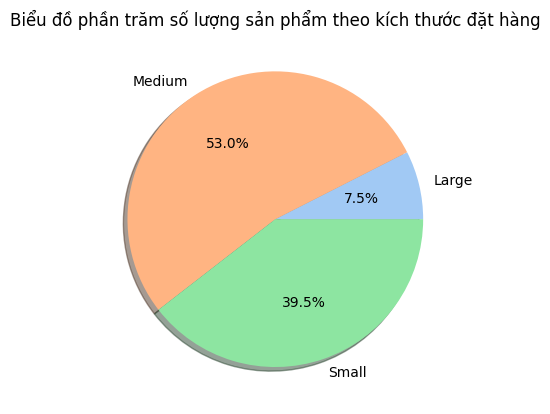

In [48]:
# Phần trăm số lượng sản phẩm 
# theo kích thước đặt hàng 
gb = df.groupby(['DEALSIZE']) ['QUANTITYORDERED'].agg(['sum'])
labels = gb.index
data =  list(gb['sum'])
color = sb.color_palette('pastel')
plt.title('Biểu đồ phần trăm số lượng sản phẩm theo kích thước đặt hàng')
plt.pie(data, labels = labels , colors=color, autopct= '%1.1f%%', shadow= True)
plt.show()

In [52]:
# Giá trị của SALES sau khi dung chuẩn hóa 
# Z-score Scaler là 0.25 , 
# giá trị trước chuẩn hóa là bao nhiêu
z_score = 0.25  # Giá trị sau khi sử dụng Z-score scaler
mean = df['SALES'].mean() # Giá trị trung bình (Mean) của SALES trước khi chuẩn hóa
std_dev = std_dev = df['SALES'].std() 
# Độ lệch chuẩn (Standard Deviation) của SALES trước khi chuẩn hóa
# Tính giá trị ban đầu của SALES
sales_original = z_score * std_dev + mean
print(' Z-score Scaler là 0.25 , giá trị trước chuẩn hóa là:',sales_original)

 Z-score Scaler là 0.25 , giá trị trước chuẩn hóa là: 0.2597096575642495


In [51]:
x = 4014.27378491
# Giá trị trung bình của biến định lượng
mean = df['SALES'].mean()
# Độ lệch chuẩn 
std_dev = df['SALES'].std()
# Tính Z-score
z = (x - mean) / std_dev
print('Z-score khi giá trị sales 4014.27378491:',z)

Z-score khi giá trị sales 4014.27378491: 29640.46667098383


In [54]:
#Tương quan mẫu giữa QUANTIYORDERED và SALES
print('Tương quan mẫu giữa QUANTIYORDERED và SALES.')
df[['SALES', 'QUANTITYORDERED']].corr()

Tương quan mẫu giữa QUANTIYORDERED và SALES.


,SALES,QUANTITYORDERED
SALES,1.000000,0.551426
QUANTITYORDERED,0.551426,1.000000


Tương quan <br>
Hoàn hảo: 1 hoặc -1 <br>
Thuận: 0.5-1 hoặc -0.5- -1 <br>
Yếu -0.5 đến 0.5 <br>
ko tương quan là 0

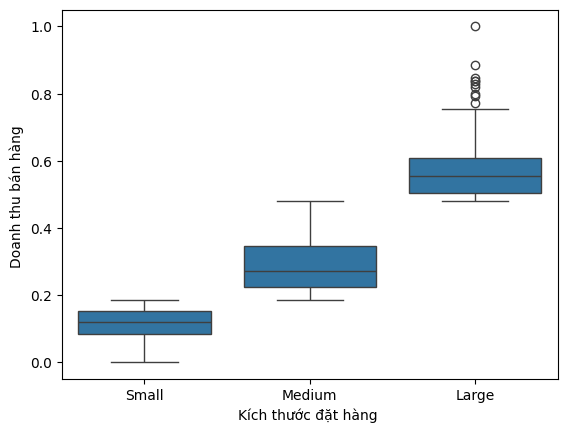

In [56]:
# Dựa vào biểu đồ boxplot về 
# doanh số trên từng nhóm kích thước đặt hàng 
# thì yếu tố kích thước đặt hàng có vai trò 
# trong việc dự báo giá trị dặt hàng hay không 
sb.boxplot(x='DEALSIZE',y='SALES',data=df)
plt.xlabel('Kích thước đặt hàng ')
plt.ylabel('Doanh thu bán hàng ')
plt.show() 

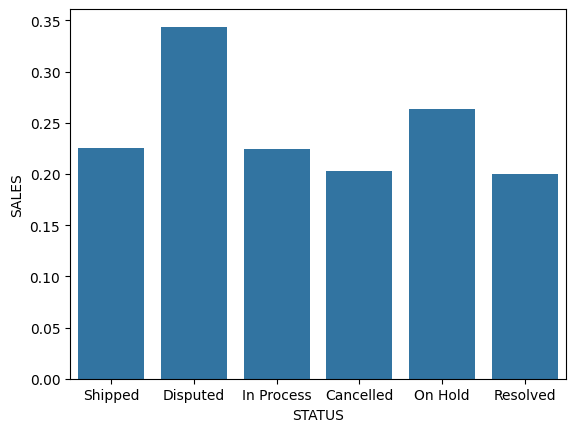

In [57]:
#bar status sales
sb.barplot (y='SALES', x ='STATUS', data =df, errorbar=None)
plt.show()

In [59]:
# Sử dụng Z-core cho SALES , sau đó tiếp tục áp 
# dụng MAX Absolute Scaler thì 
# giá trị có index = 100 được scale thành bao nhiêu
# Sử dụng Z-core Scaler để chuẩn hóa Z-score cho cột SALES
z_score_scaler = StandardScaler()
df['SALES_Z'] = z_score_scaler.fit_transform(df[['SALES']])
# Sử dụng MAX Absolute Scaler để áp dụng Max Absolute Scaler cho cột SALES đã được chuẩn hóa
max_abs_scaler = MaxAbsScaler()
df['SALES_MaxAbs'] = max_abs_scaler.fit_transform(df[['SALES_Z']])
# Lấy giá trị của phần tử có index 100 sau khi áp dụng MAX Absolute Scaler
scaled_value = df.at[100, 'SALES_MaxAbs']
print('Lấy giá trị của phần tử có index 100 sau khi áp dụng MAX Absolute Scaler:',scaled_value)

Lấy giá trị của phần tử có index 100 sau khi áp dụng MAX Absolute Scaler: -0.05354391121357396


In [60]:
country_sales = df.groupby('COUNTRY')['SALES'].sum().reset_index()
# Sắp xếp dữ liệu theo tổng doanh số giảm dần
sorted_country_sales = country_sales.sort_values(by='SALES', ascending=False)
# Lấy quốc gia ở vị trí thứ 5
fifth_country = sorted_country_sales.iloc[4]['COUNTRY']
total_sales_fifth_country = sorted_country_sales.iloc[4]['SALES']

print(f"Quốc gia ở vị trí thứ 5 về tổng doanh số là: {fifth_country}")
print(f"Tổng doanh số của quốc gia {fifth_country} là: {total_sales_fifth_country}")

Quốc gia ở vị trí thứ 5 về tổng doanh số là: UK
Tổng doanh số của quốc gia UK là: 30.1054095129137


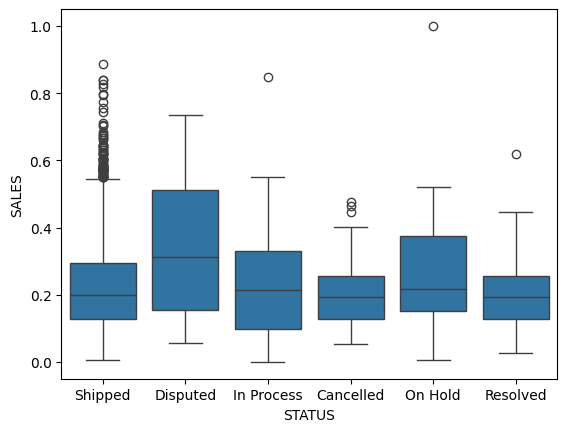

In [62]:
# Có mối liên hệ nào giữa trạng thái 
# giao hàng và giá trị đặt hàng hay không 
sb.boxplot(x='STATUS', y='SALES', data=df)
plt.show()

In [64]:
# # Nhóm dữ liệu theo kích thước đặt hàng và tính trung bình giá trị bán hàng trong mỗi nhóm
# average_sales_by_dealsize = 
# # Sắp xếp dữ liệu theo giá trị trung bình tăng dần
# sorted_sales_by_dealsize = average_sales_by_dealsize.sort_values()
# # Hiển thị thứ tự ổn định tăng dần của giá trị bán hàng trên từng nhóm kích thước đặt hàng
df.groupby('DEALSIZE')['SALES'].mean().sort_values()

DEALSIZE
Small     0.116138
Medium    0.287949
Large     0.574356
Name: SALES, dtype: float64

In [65]:
df.groupby('DEALSIZE')['SALES'].describe()

,count,mean,std,min,25%,50%,75%,max
DEALSIZE,,,,,,,,
Large,157.0,0.574356,0.095197,0.480431,0.503426,0.553387,0.608247,1.000000
Medium,1384.0,0.287949,0.076988,0.185305,0.223089,0.270620,0.345151,0.478968
Small,1282.0,0.116138,0.042438,0.000000,0.085011,0.119983,0.151644,0.185126


In [67]:
# Hãy cho biết dựa vào biểu đồ 
# boxplot về doanh số trên từng 
# kích thước đặt hàng, 
# nếu có dữ liệu thiếu trên nhóm  
# DEALSIZE = Medium thì dữ liệu đó 
# nên được thay thế bằng
print('Kết quả:',(df[df['DEALSIZE'] == 'Small']['SALES'].mean() + df[df['DEALSIZE'] == 'Medium']['SALES'].mean()) / 2.0)

Kết quả: 0.20204359416609538


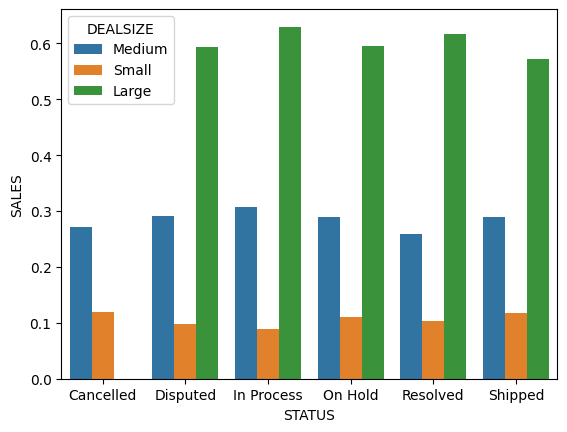

In [68]:
#Hãy cho biết biểu đồ chỉ có 2 cột thuộc nhóm status nào
groupby_data = df.groupby(['STATUS', 'DEALSIZE'])['SALES'].mean().reset_index()
# Vẽ biểu đồ cột
sb.barplot(x='STATUS', y='SALES', hue='DEALSIZE', data=groupby_data)
plt.show()

In [69]:
df.groupby('ORDERNUMBER')['QUANTITYORDERED'].sum().sort_values(ascending=False).head(12)

ORDERNUMBER
10222    717
10106    675
10165    670
10386    650
10168    642
10398    629
10316    623
10332    621
10204    619
10310    619
10126    617
10207    615
Name: QUANTITYORDERED, dtype: int64